# Mask CycleGAN

Mask CycleGAN is an improvment to the original CycleGAN, indeed it deals with an Image-To-Image Translation between two domains.
 It uses a different architecture and a masking scheme to solve two main problems of CycleGAN, that are:
-	The unimodality in image translation
-	The lack of interpretability of latent variables.

So to solve these problems it uses pixel masks as latent variables, and it modifies the structure of the Generator of the original CycleGAN as it follows.

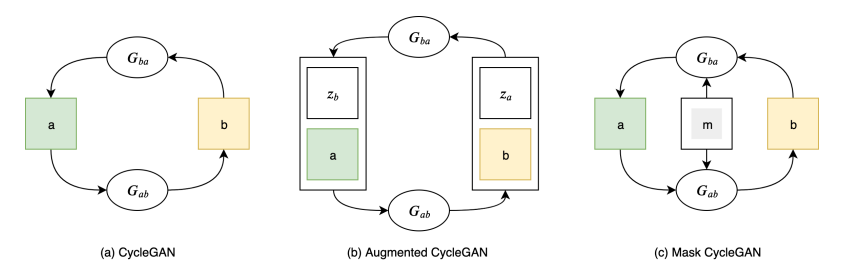


## Introduction to GAN and CycleGAN

Generative Adversarial Networks are a class of machine learning framework developed in 2014. They’re generative because they’re not used for classification and detection tasks, but to generate new images in output. They’re adversarial because they use two different networks that act in a mutual way and in which the one completes the other.
These two networks are:
-	Generator: It tries to create new realistic images in output. To train it we use the loss obtained on the discriminator but changing the sign. Indeed we minimized the loss on the Discriminator to classify in the correct way real and fake images, so we can freeze the discriminator and backprogagate that loss in the generator but maximizing it: in this way the Discriminator is fooled and the Generator is able to generate realistic images.
-	Discriminator: It tries to distinguish if an image is real or fake. The Generator takes in input a random vector that contains noise, so it generates unrealistic images. Meanwhile the Discriminator is not able to distinguish between real and fake images, so we can train it giving in input some real images and some fake images generated by the generator from noise. In this way it will generate a loss and backpropagating it the Discriminator will be trained.

CycleGAN is a specific type of GAN that is able to take an image that is in a certain domain and to transform it in another one, generating a pair of the same image in the two different domains. It uses two GAN models that are trained in the same time, in which one domain learns from the other one.

It has two generators that work in parallel: Gab takes real images in input from the domain A and it gives in output a realistic image of domain B, while Gba does the opposite. The discriminator is able to distinguish between real and fake images from domain B. It’s a patchGAN, that rather than classify the entire image it classifies some patches from the image. Furthermore, there’s a L2 loss that connects the two generators: it tells how much an image from domain A is similar to the same image mapped on domain B and then mapped again on domain A. This loss is made at pixel level, so using it the generator cannot change a lot the shape of the image, because it has to mantain this loss low. The only thing that the generator can change is the texture. So there are three loss to put to zero: L2 loss, loss of Gab and loss of Gba.
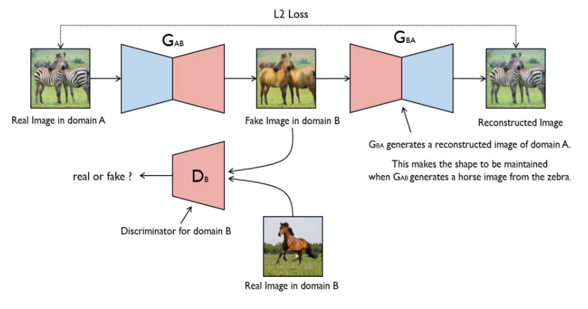


## Masking Schemes

In Mask CycleGAN are used Binary Masks, that are mask that have value one in the masked regions, while they have 0 in the other parts.
We used two types of masks:
-	Centered-Square Masking Scheme: They are masks with a square shape and that have their center in the center of the image. We used this type of masks with sizes 0.5, 0.8 and 1.0.

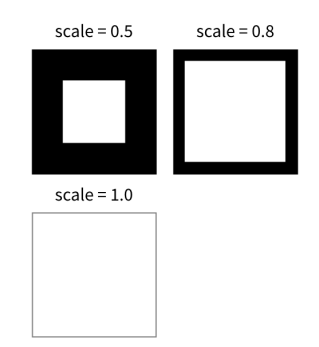

-	Multi-Rectangles Masking Scheme: It is a generalization of the other type of masks, in which the mask is composed by different rectangles of various sizes.

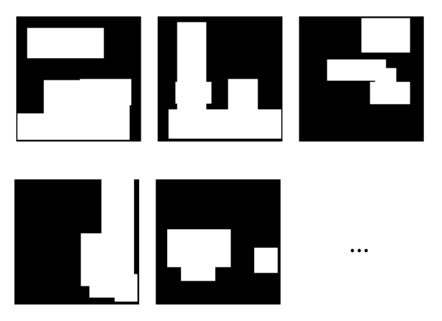


Cloning into 'Mask-CycleGAN'...
remote: Enumerating objects: 17964, done.
remote: Counting objects: 100% (2015/2015), done.
remote: Compressing objects: 100% (1683/1683), done.
remote: Total 17964 (delta 331), reused 1983 (delta 318), pack-reused 15949
Receiving objects: 100% (17964/17964), 659.86 MiB | 29.11 MiB/s, done.
Resolving deltas: 100% (335/335), done.
Updating files: 100% (32114/32114), done.
/content/Mask-CycleGAN
Mounted at /content/drive
Loading model: 
Loading model: 
Loading model: 
Loading model: 
Loading model: 
Loading model: 


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 140/140 [05:36<00:00,  2.40s/it]
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 201MB/s]
100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


FID:  75.16974197093703
../drive/MyDrive/Test/HorseToZebra100/Zebra50     ../drive/MyDrive/Test/HorseToZebra100/Zebra80
75.16974197093703


100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


FID:  58.12005284432311
../drive/MyDrive/Test/HorseToZebra100/Zebra50     ../drive/MyDrive/Test/HorseToZebra100/Zebra100/
58.12005284432311


100%|██████████| 27/27 [00:07<00:00,  3.55it/s]


FID:  60.04322427305618
../drive/MyDrive/Test/HorseToZebra100/Zebra50     Datasets/Train/trainZebra
60.04322427305618


100%|██████████| 3/3 [00:01<00:00,  2.74it/s]


FID:  66.37572115459878
../drive/MyDrive/Test/HorseToZebra100/Zebra50     Datasets/Test/testZebra
66.37572115459878


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


FID:  85.398570018975
../drive/MyDrive/Test/HorseToZebra100/Zebra80     ../drive/MyDrive/Test/HorseToZebra100/Zebra100/
85.398570018975


100%|██████████| 27/27 [00:06<00:00,  4.11it/s]


FID:  109.97713175040326
../drive/MyDrive/Test/HorseToZebra100/Zebra80     Datasets/Train/trainZebra
109.97713175040326


100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


FID:  119.59261920447886
../drive/MyDrive/Test/HorseToZebra100/Zebra80     Datasets/Test/testZebra
119.59261920447886


100%|██████████| 27/27 [00:07<00:00,  3.69it/s]


FID:  55.915755391167934
../drive/MyDrive/Test/HorseToZebra100/Zebra100/     Datasets/Train/trainZebra
55.915755391167934


100%|██████████| 3/3 [00:01<00:00,  2.81it/s]


FID:  62.42216066338514
../drive/MyDrive/Test/HorseToZebra100/Zebra100/     Datasets/Test/testZebra
62.42216066338514


100%|██████████| 3/3 [00:01<00:00,  2.68it/s]


FID:  26.209053013974682
Datasets/Train/trainZebra     Datasets/Test/testZebra
26.209053013974682
[['', 'scale=0.50', 'scale=0.80', 'scale=1.00', 'train', 'test'], ['scale=0.50', 0, 75.16974197093703, 58.12005284432311, 60.04322427305618, 66.37572115459878], ['scale=0.80', 75.16974197093703, 0, 85.398570018975, 109.97713175040326, 119.59261920447886], ['scale=1.00', 58.12005284432311, 85.398570018975, 0, 55.915755391167934, 62.42216066338514], ['train', 60.04322427305618, 109.97713175040326, 55.915755391167934, 0, 26.209053013974682], ['test', 66.37572115459878, 119.59261920447886, 62.42216066338514, 26.209053013974682, 0]]
['', 'scale=0.50', 'scale=0.80', 'scale=1.00', 'train', 'test']
['scale=0.50', 0, 75.16974197093703, 58.12005284432311, 60.04322427305618, 66.37572115459878]
['scale=0.80', 75.16974197093703, 0, 85.398570018975, 109.97713175040326, 119.59261920447886]
['scale=1.00', 58.12005284432311, 85.398570018975, 0, 55.915755391167934, 62.42216066338514]
['train', 60.0432242730

100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


FID:  34.66216489488963
../drive/MyDrive/Test/HorseToZebra100/Horse50     ../drive/MyDrive/Test/HorseToZebra100/Horse80
34.66216489488963


100%|██████████| 3/3 [00:01<00:00,  1.73it/s]


FID:  61.92925519243738
../drive/MyDrive/Test/HorseToZebra100/Horse50     ../drive/MyDrive/Test/HorseToZebra100/Horse100/
61.92925519243738


100%|██████████| 22/22 [00:05<00:00,  4.12it/s]


FID:  193.5473739835785
../drive/MyDrive/Test/HorseToZebra100/Horse50     Datasets/Train/trainHorse
193.5473739835785


100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


FID:  215.13369104605616
../drive/MyDrive/Test/HorseToZebra100/Horse50     Datasets/Test/testHorse
215.13369104605616


100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


FID:  48.70775787521396
../drive/MyDrive/Test/HorseToZebra100/Horse80     ../drive/MyDrive/Test/HorseToZebra100/Horse100/
48.70775787521396


100%|██████████| 22/22 [00:05<00:00,  3.71it/s]


FID:  192.87170945584495
../drive/MyDrive/Test/HorseToZebra100/Horse80     Datasets/Train/trainHorse
192.87170945584495


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


FID:  214.68660305959503
../drive/MyDrive/Test/HorseToZebra100/Horse80     Datasets/Test/testHorse
214.68660305959503


100%|██████████| 22/22 [00:05<00:00,  3.72it/s]


FID:  174.6754509016685
../drive/MyDrive/Test/HorseToZebra100/Horse100/     Datasets/Train/trainHorse
174.6754509016685


100%|██████████| 3/3 [00:00<00:00,  3.02it/s]


FID:  198.88447077751476
../drive/MyDrive/Test/HorseToZebra100/Horse100/     Datasets/Test/testHorse
198.88447077751476


100%|██████████| 3/3 [00:01<00:00,  2.42it/s]


FID:  79.74053575320906
Datasets/Train/trainHorse     Datasets/Test/testHorse
79.74053575320906
[['', 'scale=0.50', 'scale=0.80', 'scale=1.00', 'train', 'test'], ['scale=0.50', 0, 34.66216489488963, 61.92925519243738, 193.5473739835785, 215.13369104605616], ['scale=0.80', 34.66216489488963, 0, 48.70775787521396, 192.87170945584495, 214.68660305959503], ['scale=1.00', 61.92925519243738, 48.70775787521396, 0, 174.6754509016685, 198.88447077751476], ['train', 193.5473739835785, 192.87170945584495, 174.6754509016685, 0, 79.74053575320906], ['test', 215.13369104605616, 214.68660305959503, 198.88447077751476, 79.74053575320906, 0]]
['', 'scale=0.50', 'scale=0.80', 'scale=1.00', 'train', 'test']
['scale=0.50', 0, 34.66216489488963, 61.92925519243738, 193.5473739835785, 215.13369104605616]
['scale=0.80', 34.66216489488963, 0, 48.70775787521396, 192.87170945584495, 214.68660305959503]
['scale=1.00', 61.92925519243738, 48.70775787521396, 0, 174.6754509016685, 198.88447077751476]
['train', 193.54

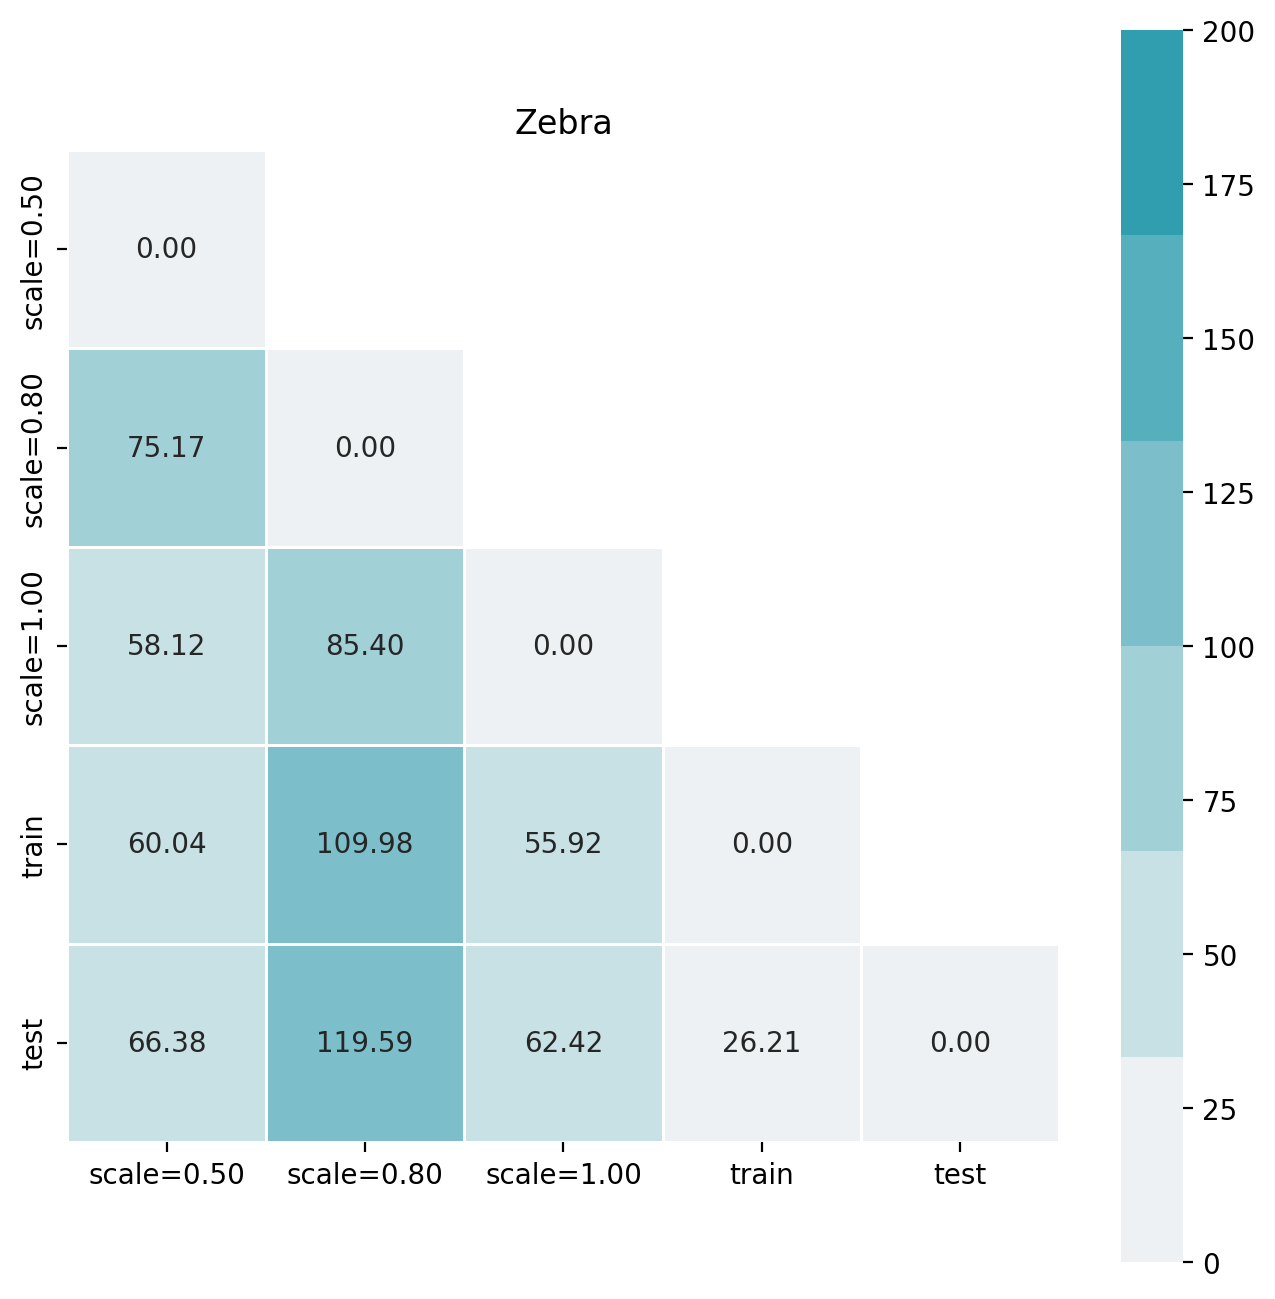

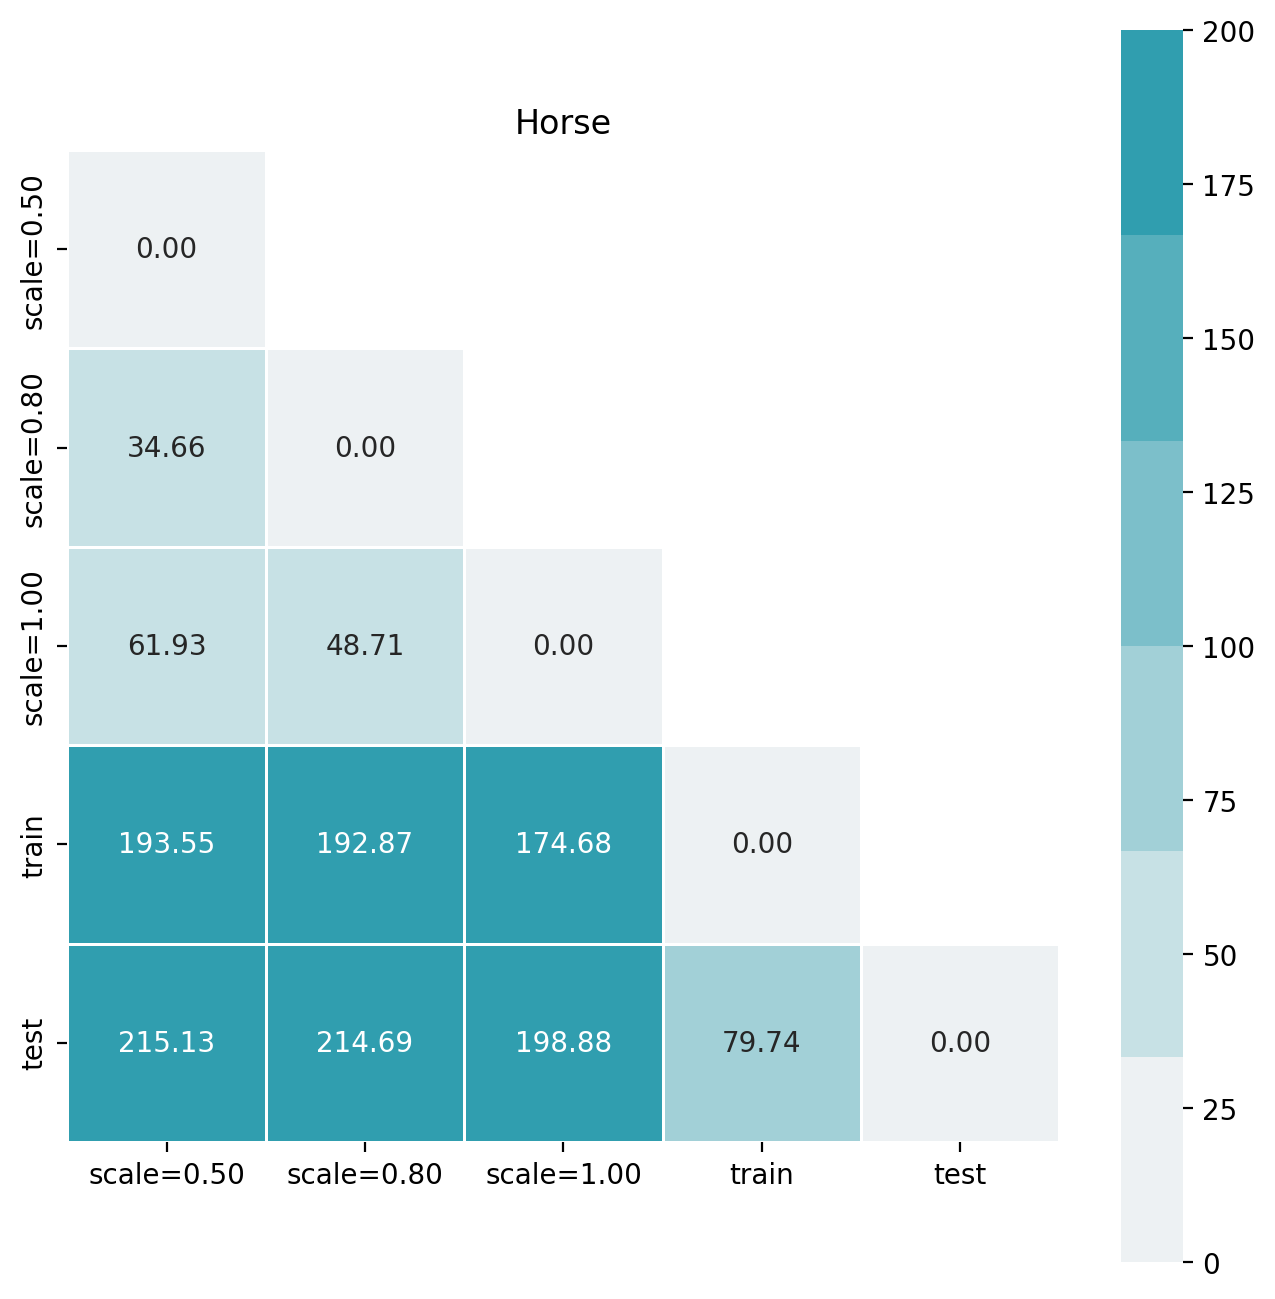

In [ ]:
!git clone https://github.com/Federico6419/Mask-CycleGAN          #It clones our github repository
%cd Mask-CycleGAN

from google.colab import drive
drive.mount('/content/drive')

#IMPORTS
from dataset import Dataset
import config
from discriminator import Discriminator
from generator import Generator
import torch
import numpy as np
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image
from torch import Tensor
from tqdm import tqdm
from torch.autograd import Variable
import torch.autograd as autograd
from torch.utils.tensorboard import SummaryWriter
import random
from PIL import Image
import torchvision.transforms as T
import math
from fid import compute_fid_matrix
import os.path
from os import path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


######### FUNCTIONS FOR SAVE AND LOAD MODELS #########
#This function saves the weights of the model in a file
def save_model(model, optimizer, epoch, filename="my_checkpoint.pth.tar"):
    print("Saving model for epoch : "+ str(epoch))

    torch.save({
        "state_dict": model.state_dict(),
        "optimizer": optimizer.state_dict(),
    }, filename)


#This function loads the precomputed weights of the model from a file
def load_model(file, model, optimizer, lr):
    print("Loading model: ")
    model_check = torch.load(file, map_location=config.DEVICE)
    model.load_state_dict(model_check["state_dict"])
    optimizer.load_state_dict(model_check["optimizer"])

    #epoch =model_check["epoch"]

    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

######### END FUNCTIONS FOR SAVE AND LOAD MODELS ##########


######### FUNCTIONS THAT GENERATES A RANDOM MASKS ##########
def mask_generator(mask_type):
    #If the type of mask is sqared
    if(mask_type == "Squared"):
        scales = [0.5, 0.8, 1.0]

        current_scale = random.choice(scales)

        imageSize = 256                   #Size of the image
        image_center = imageSize // 2

        i = int(image_center - image_center * current_scale)
        j = int(image_center + image_center * current_scale)

        mask = torch.zeros(3, imageSize, imageSize, requires_grad=False)

        mask[:, i:j, i:j] = 1.0
        return mask

    #If the type of mask is rectangular
    elif(mask_type == "Rectangular"):
        #With a probability of 20% we have a full mask
        if random.random() < 0.2:
            imageSize = 256                   #Size of the image
            mask = torch.zeros(3, imageSize, imageSize, requires_grad=False)
            mask[:, :, :] = 1.0
            return mask

        else:
            maxNum = 5                        #Maximum number of rectangles to draw
            minNum = int(random.uniform(1, 5))       #Minimum number of rectangles to draw

            minArea = 0.15                    #Minimal accumulative area relative to the whole image area

            imageSize = 256                   #Size of the image
            minRectSize = imageSize/10        #Minimum size of the rectangles
            maxRectSize= imageSize            #Maximum size of the rectangles

            numRects = 0                      #Initialize the number of rectangles to 0
            sumRelArea = 0.0
            mask = torch.zeros(3, imageSize, imageSize, requires_grad=False)

            while((numRects < minNum) or (sumRelArea < minArea)):
                #Randomly generate the top left corner of the rectangle
                i0 = int(random.uniform(0, imageSize - minRectSize))
                j0 = int(random.uniform(0, imageSize - minRectSize))

                #Randomly generate the bottom right corner of the rectangle.
                i1 = int(random.uniform(i0 + minRectSize, min(i0 + maxRectSize, imageSize)))
                j1 = int(random.uniform(j0 + minRectSize, min(j0 + maxRectSize, imageSize)))

                #Draw rectangle on the mask
                mask[:, i0:i1, j0:j1] = 1.0
                numRects += 1
                sumRelArea += ((i1 - i0) * (j1 - j0)) / (imageSize * imageSize)

            return mask


#Circular mask generator
def circular_mask_generator(scale):

    imageSize = 256                   #Size of the image
    mask = torch.zeros(3, imageSize, imageSize, requires_grad=False)

    center = (int(256/2), int(256/2))

    radius = (256 // 2) * scale

    for x in range(256):
        for y in range(256):
            dist_from_center = math.sqrt((x - center[0])**2 + (y-center[1])**2)
            if(dist_from_center <= radius):
                mask[:, x, y]=1.0

    return mask





########################### TRAIN FUNCTION #########################
def train_fn(disc_A, disc_B, disc_AM, disc_BM, gen_B, gen_A, loader, opt_disc, opt_gen, l1, mse, d_scaler, g_scaler,LAMBDA_IDENTITY, LAMBDA_CYCLE, LAMBDA_MASK, LAMBDA_CYCLE_MASK, TRAIN_MASK):

    loop = tqdm(loader, leave=True)           #leave=True to avoid print newline

    for idx, (domainB, domainA) in enumerate(loop):                             #It loops over the images from domain A and domain B
        domainA = domainA.to(config.DEVICE)                                     #Its puts the images from the two domains one the device
        domainB = domainB.to(config.DEVICE)

        #Label printed every epoch to see the prediction of the discriminators
        A_is_real = 0
        A_is_fake = 0
        AM_is_real = 0
        AM_is_fake = 0
        B_is_real = 0
        B_is_fake = 0
        BM_is_real = 0
        BM_is_fake = 0


        #Create a random Mask
        mask = mask_generator(TRAIN_MASK)
        mask = mask.to(config.DEVICE)


        with torch.cuda.amp.autocast():

            ############## TRAIN DISCRIMINATOR DOMAIN B #############
            fake_B = gen_B(domainA, mask)              #Generate with Generator a fake image from domain B starting from an image from domain A

            #Compute probability of the real image and of the fake image to be a real image from domain B using the Discriminator
            D_B_real = disc_B(domainB)
            D_B_fake = disc_B(fake_B.detach())

            #Used to print the percentage that the given image is predicted real or fake !!!!
            B_is_real += D_B_real.mean().item()
            B_is_fake += D_B_fake.mean().item()

            #Compute the Mean Squared Error
            D_B_real_loss = mse(D_B_real, torch.ones_like(D_B_real))    #MSE computed between the prediction of the real image made by Discriminator and a Tensor composed by all ones
            D_B_fake_loss = mse(D_B_fake, torch.zeros_like(D_B_fake))   #MSE computed between the prediction of the fake image made by Discriminator and a Tensor composed by all zeros
            D_B_loss = D_B_real_loss + D_B_fake_loss                    #Sum the real image loss and the fake image loss



            ############## TRAIN MASK DISCRIMINATOR DOMAIN B #############
            #fake_B = gen_B(domainA)              #Generate with Generator a fake image from domain B starting from an image from domain A

            #Compute probability of the real image and of the fake image to be a real image from domain B using the Discriminator
            DM_B_real = disc_BM(domainB*mask)
            DM_B_fake = disc_BM((fake_B*mask).detach())

            #Used to print the percentage that the given image is predicted real or fake !!!!
            BM_is_real += DM_B_real.mean().item()
            BM_is_fake += DM_B_fake.mean().item()

            #Compute the Mean Squared Error
            DM_B_real_loss = mse(DM_B_real, torch.ones_like(DM_B_real))    #MSE computed between the prediction of the real image made by Discriminator and a Tensor composed by all ones
            DM_B_fake_loss = mse(DM_B_fake, torch.zeros_like(DM_B_fake))   #MSE computed between the prediction of the fake image made by Discriminator and a Tensor composed by all zeros
            DM_B_loss = DM_B_real_loss + DM_B_fake_loss                    #Sum the real image loss and the fake image loss


            ########### SUM TWO DISCRIMINATORS FROM DOMAIN B ##############
            D_B_total_loss = LAMBDA_MASK * DM_B_loss + (1 - LAMBDA_MASK) * D_B_loss



            ########### TRAIN DISCRIMINATOR OF THE DOMAIN A ##############
            fake_A = gen_A(domainB, mask)             #Generate with Generator a fake image from domain A starting from an image from domain B

            #Compute probability of the real image and of the fake image to be a real image from domain B using the Discriminator
            D_A_real = disc_A(domainA)
            D_A_fake = disc_A(fake_A.detach())

            #Used print the percentage that the given image is predicted real or fake !!!!
            A_is_real += D_A_real.mean().item()
            A_is_fake += D_A_fake.mean().item()

            #Compute the Mean Squared Error
            D_A_real_loss = mse(D_A_real, torch.ones_like(D_A_real))    #MSE computed between the prediction of the real image made by Discriminator and a Tensor composed by all ones
            D_A_fake_loss = mse(D_A_fake, torch.zeros_like(D_A_fake))   #MSE computed between the prediction of the fake image made by Discriminator and a Tensor composed by all zeros
            D_A_loss = D_A_real_loss + D_A_fake_loss                    #Sum the real image loss and the fake image loss


            ############## TRAIN MASK DISCRIMINATOR DOMAIN A #############
            #fake_A = gen_A(domainB)              #Generate with Generator a fake image from domain B starting from an image from domain A

            #Compute probability of the real image and of the fake image to be a real image from domain B using the Discriminator
            DM_A_real = disc_AM(domainA*mask)
            DM_A_fake = disc_AM((fake_A*mask).detach())

            #Used to print the percentage that the given image is predicted real or fake !!!!
            AM_is_real += DM_A_real.mean().item()
            AM_is_fake += DM_A_fake.mean().item()

            #Compute the Mean Squared Error
            DM_A_real_loss = mse(DM_A_real, torch.ones_like(DM_A_real))    #MSE computed between the prediction of the real image made by Discriminator and a Tensor composed by all ones
            DM_A_fake_loss = mse(DM_A_fake, torch.zeros_like(DM_A_fake))   #MSE computed between the prediction of the fake image made by Discriminator and a Tensor composed by all zeros
            DM_A_loss = DM_A_real_loss + DM_A_fake_loss                    #Sum the real image loss and the fake image loss


            ########### SUM TWO DISCRIMINATORS FROM DOMAIN A ##############
            D_A_total_loss = LAMBDA_MASK * DM_A_loss + (1 - LAMBDA_MASK) * D_A_loss




            #Put together the loss of the two discriminators
            D_loss = (D_A_total_loss + D_B_total_loss)/2


        opt_disc.zero_grad()
        d_scaler.scale(D_loss).backward(retain_graph=True)
        d_scaler.step(opt_disc)
        d_scaler.update()



        ########################## TRAIN GENERATORS #########################
        with torch.cuda.amp.autocast():

            #Compute the Discriminator predictions
            D_A_fake = disc_A(fake_A)
            D_B_fake = disc_B(fake_B)
            D_A_real = disc_A(domainA)
            D_B_real = disc_B(domainB)

            #Compute the GAN losses
            loss_G_A = 0
            loss_G_B = 0

            loss_G_A = mse(D_A_fake, torch.ones_like(D_A_fake))  #Compute the MSE between the prediction of the Discriminator of the fake image from domain A and a tensor with all ones
            loss_G_B = mse(D_B_fake, torch.ones_like(D_B_fake))  #Compute the MSE between the prediction of the Discriminator of the fake image from domain B and a tensor with all ones


            #Compute the Mask Discriminator predictions
            DM_A_fake = disc_AM(fake_A * mask)
            DM_B_fake = disc_BM(fake_B * mask)
            DM_A_real = disc_AM(domainA * mask)
            DM_B_real = disc_BM(domainB * mask)

            #Compute the GAN losses
            loss_GM_A = 0
            loss_GM_B = 0

            loss_GM_A = mse(DM_A_fake, torch.ones_like(DM_A_fake))  #Compute the MSE between the prediction of the Discriminator of the fake image from domain A and a tensor with all ones
            loss_GM_B = mse(DM_B_fake, torch.ones_like(DM_B_fake))  #Compute the MSE between the prediction of the Discriminator of the fake image from domain B and a tensor with all ones


            #CYCLE LOSS
            cycle_A = gen_A(fake_B, mask)
            cycle_B = gen_B(fake_A, mask)
            cycle_A_loss = l1(domainA, cycle_A)
            cycle_B_loss = l1(domainB, cycle_B)


            #CYCLE MASK LOSS
            fake_AM = gen_A(domainB, (1 - mask))
            fake_BM = gen_B(domainA, (1 -mask))
            cycle_A = gen_A(fake_BM, (1 - mask))
            cycle_B = gen_B(fake_AM, (1 - mask))
            cycle_AM_loss = l1(domainA * (1 - mask), cycle_A)
            cycle_BM_loss = l1(domainB * (1 - mask), cycle_B)

            #SUM THE CYCLE LOSSES
            cycle_total_loss_A = LAMBDA_CYCLE_MASK * cycle_A_loss + (1 - LAMBDA_CYCLE_MASK) * cycle_AM_loss
            cycle_total_loss_B = LAMBDA_CYCLE_MASK * cycle_B_loss + (1 - LAMBDA_CYCLE_MASK) * cycle_BM_loss


            #IDENTITY LOSS
            identity_A = gen_A(domainA, mask)
            identity_B = gen_B(domainB, mask)
            identity_loss_A = l1(domainA, identity_A)
            identity_loss_B = l1(domainB, identity_B)

            #Add all losses together, multiplied by their relative parameter
            G_loss = (
                loss_G_B * (1 - LAMBDA_MASK)
                + loss_G_A * (1 - LAMBDA_MASK)
                + loss_GM_B * LAMBDA_MASK
                + loss_GM_A * LAMBDA_MASK
                + cycle_total_loss_B * LAMBDA_CYCLE
                + cycle_total_loss_A * LAMBDA_CYCLE
                + identity_loss_A * LAMBDA_IDENTITY
                + identity_loss_B * LAMBDA_IDENTITY
            )


        opt_gen.zero_grad()
        g_scaler.scale(G_loss).backward(retain_graph=True)
        g_scaler.step(opt_gen)
        g_scaler.update()

        ##########################  END TRAIN GENERATORS #########################


        #Save tensors into images every 150 to see in real time the progress of the net
        if idx % 150 == 0:
            save_image(mask, f"Saved_Images/Mask_{idx}.png")
            save_image(fake_B*0.5+0.5, f"Saved_Images/domainB_{idx}.png")
            save_image(fake_A*0.5+0.5, f"Saved_Images/domainA_{idx}.png")

        #Set postfixes to the progess bar of tqdm
        #loop.set_postfix(A_real=A_is_real/(idx+1), A_fake=A_is_fake/(idx+1),B_real=B_is_real/(idx+1), B_fake=B_is_fake/(idx+1))
        loop.set_postfix(G_loss=G_loss.item(), D_loss=D_loss.item(), cycle_A_loss=cycle_A_loss.item(), cycle_B_loss=cycle_B_loss.item())

########################### END TRAIN FUNCTION ######################



#TEST FUNCTION
def test_fn(gen_B, gen_A, test_loader, TEST_FOLDER, TEST_FOLDER_A, TEST_FOLDER_B):

    os.mkdir(f'/content/drive/MyDrive/Test/{TEST_FOLDER}')
    os.mkdir(f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}")
    os.mkdir(f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}50")
    os.mkdir(f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}80")
    os.mkdir(f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}100")
    os.mkdir(f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}")
    os.mkdir(f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}50")
    os.mkdir(f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}80")
    os.mkdir(f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}100")


    loop = tqdm(test_loader, leave=True)

    for idx, (domainB, domainA) in enumerate(loop):
            domainA = domainA.to(config.DEVICE)
            domainB = domainB.to(config.DEVICE)

            save_image(domainA*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}/original_{idx}.png")
            save_image(domainB*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}/original_{idx}.png")

            for mask_type in range(1,11):
                    mask = np.array(Image.open(f"Test/Test_Masks/Mask_{mask_type}.png").convert("RGB"))
                    trans = T.Compose([T.ToTensor()])
                    mask = trans(mask)
                    mask = mask.to(config.DEVICE)

                    fake_B = gen_B(domainA, mask)
                    fake_A = gen_A(fake_B, mask)

                    save_image(fake_B*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}/domainBMask{mask_type}_{idx}.png")
                    save_image(fake_A*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}/domainAMask{mask_type}_{idx}.png")
                    if(mask_type == 1):
                        save_image(fake_B*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}100/domainBMask{mask_type}_{idx}.png")
                    elif(mask_type == 2):
                        save_image(fake_B*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}50/domainBMask{mask_type}_{idx}.png")
                    elif(mask_type == 3):
                        save_image(fake_B*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}80/domainBMask{mask_type}_{idx}.png")

                    fake_A = gen_A(domainB, mask)
                    fake_B = gen_B(fake_A, mask)

                    save_image(fake_B*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}/domainBMask{mask_type}_{idx}.png")
                    save_image(fake_A*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}/domainAMask{mask_type}_{idx}.png")
                    if(mask_type == 1):
                        save_image(fake_A*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}100/domainAMask{mask_type}_{idx}.png")
                    elif(mask_type == 2):
                        save_image(fake_A*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}50/domainAMask{mask_type}_{idx}.png")
                    elif(mask_type == 3):
                        save_image(fake_A*0.5+0.5, f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}80/domainAMask{mask_type}_{idx}.png")

    #COMPUTE FID
    compute_fid_matrix(TEST_FOLDER_A, f"../drive/MyDrive/Test/{TEST_FOLDER}", f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}50", f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}80", f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_A}100/", f"Datasets/Train/train{TEST_FOLDER_A}", f"Datasets/Test/test{TEST_FOLDER_A}")
    compute_fid_matrix(TEST_FOLDER_B, f"../drive/MyDrive/Test/{TEST_FOLDER}", f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}50", f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}80", f"../drive/MyDrive/Test/{TEST_FOLDER}/{TEST_FOLDER_B}100/", f"Datasets/Train/train{TEST_FOLDER_B}", f"Datasets/Test/test{TEST_FOLDER_B}")


    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns


    def plot_fid_heatmap(path, title):
        fid_df = pd.read_csv(path, delimiter='\t', index_col=0)

        mask = np.zeros_like(fid_df)
        mask[np.triu_indices_from(mask, k=1)] = True

        plt.figure(figsize=(8, 8), dpi=200)
        ax = sns.heatmap(
            fid_df,
            mask=mask,
            vmin=0,
            vmax=200,
            annot=True,
            linewidths=.5,
            square=True,
            fmt='.2f',
            cmap=sns.light_palette((210, 90, 60), input="husl"))
        ax.set_title(title)
        plt.savefig(f'../drive/MyDrive/Test/{TEST_FOLDER}/FID-{title}', bbox_inches='tight')

    plot_fid_heatmap(f"../drive/MyDrive/Test/{TEST_FOLDER}/FID_Matrix-{TEST_FOLDER_A}", f"{TEST_FOLDER_A}")
    plot_fid_heatmap(f"../drive/MyDrive/Test/{TEST_FOLDER}/FID_Matrix-{TEST_FOLDER_B}", f"{TEST_FOLDER_B}")





###################### MAIN FUNCTION #######################
def main():
    #Initialize Discriminators and Generators
    disc_A = Discriminator(in_channels=3).to(config.DEVICE)
    disc_B = Discriminator(in_channels=3).to(config.DEVICE)
    disc_AM = Discriminator(in_channels=3).to(config.DEVICE)
    disc_BM = Discriminator(in_channels=3).to(config.DEVICE)
    gen_A = Generator(img_channels=3).to(config.DEVICE)
    gen_B = Generator(img_channels=3).to(config.DEVICE)

    #Adam for Discriminators
    opt_disc = optim.Adam(
        list(disc_A.parameters()) + list(disc_B.parameters()) + list(disc_AM.parameters()) + list(disc_BM.parameters()),
        lr=config.LEARNING_RATE,
        betas=(0.5, 0.999),
    )

    #Adam for Generators
    opt_gen = optim.Adam(
        list(gen_B.parameters()) + list(gen_A.parameters()),
        lr=config.LEARNING_RATE,
        betas=(0.5, 0.999),
    )

    #Define L1 and Mean Squared Error loss
    L1 = nn.L1Loss()
    mse = nn.MSELoss()

    #Load pretrained model
    if config.LOAD_MODEL:
        load_model(
            config.CHECKPOINT_GEN_A, gen_A, opt_gen, config.LEARNING_RATE,
        )
        load_model(
            config.CHECKPOINT_GEN_B, gen_B, opt_gen, config.LEARNING_RATE,
        )
        load_model(
            config.CHECKPOINT_DISC_A, disc_A, opt_disc, config.LEARNING_RATE,
        )
        load_model(
            config.CHECKPOINT_DISC_B, disc_B, opt_disc, config.LEARNING_RATE,
        )
        load_model(
            config.CHECKPOINT_DISC_AM, disc_AM, opt_disc, config.LEARNING_RATE,
        )
        load_model(
            config.CHECKPOINT_DISC_BM, disc_BM, opt_disc, config.LEARNING_RATE,
        )


    ############## CHOICE OF THE DATASET ###############
    if(config.TRANSFORMATION == "WinterToSummer"):
        dataset = Dataset(
            domainA_dir=config.TRAIN_DIR+"/trainWinter", domainB_dir=config.TRAIN_DIR+"/trainSummer", transform=config.transforms
        )
        test_dataset = Dataset(
            domainA_dir=config.TEST_DIR+"/testWinter", domainB_dir=config.TEST_DIR+"/testSummer", transform=config.transforms
        )
    elif(config.TRANSFORMATION == "HorseToZebra"):
        dataset = Dataset(
            domainA_dir=config.TRAIN_DIR+"/trainHorse", domainB_dir=config.TRAIN_DIR+"/trainZebra", transform=config.transforms
        )
        test_dataset = Dataset(
            domainA_dir=config.TEST_DIR+"/testHorse", domainB_dir=config.TEST_DIR+"/testZebra", transform=config.transforms
        )
    elif(config.TRANSFORMATION == "MonetToPhoto"):
        dataset = Dataset(
            domainA_dir=config.TRAIN_DIR+"/trainMonet", domainB_dir=config.TRAIN_DIR+"/trainPhotoMonet", transform=config.transforms
        )
        test_dataset = Dataset(
            domainA_dir=config.TEST_DIR+"/testMonet", domainB_dir=config.TEST_DIR+"/testPhotoMonet", transform=config.transforms
        )
    elif(config.TRANSFORMATION == "VanToPhoto"):
        dataset = Dataset(
            domainA_dir=config.TRAIN_DIR+"/trainVan", domainB_dir=config.TRAIN_DIR+"/trainPhotoVan", transform=config.transforms
        )
        test_dataset = Dataset(
            domainA_dir=config.TEST_DIR+"/testVan", domainB_dir=config.TEST_DIR+"/testPhotoVan", transform=config.transforms
        )
    elif(config.TRANSFORMATION == "UkiyoeToPhoto"):
        dataset = Dataset(
            domainA_dir=config.TRAIN_DIR+"/trainUkiyoe", domainB_dir=config.TRAIN_DIR+"/trainPhotoUkiyoe", transform=config.transforms
        )
        test_dataset = Dataset(
            domainA_dir=config.TEST_DIR+"/testUkiyoe", domainB_dir=config.TEST_DIR+"/testPhotoUkiyoe", transform=config.transforms
        )
    elif(config.TRANSFORMATION == "AppleToOrange"):
        dataset = Dataset(
            domainA_dir=config.TRAIN_DIR+"/trainApple", domainB_dir=config.TRAIN_DIR+"/trainOrange", transform=config.transforms
        )
        test_dataset = Dataset(
            domainA_dir=config.TEST_DIR+"/testApple", domainB_dir=config.TEST_DIR+"/testOrange", transform=config.transforms
        )


    ############# DATALOADER #############
    loader = DataLoader(
        dataset,
        batch_size=1,
        shuffle=True,
        num_workers=4,
        pin_memory=True  #for faster training(non-paged cpu memory)
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=1,
        shuffle=False,
        pin_memory=True,
    )


    #Define the scalers
    g_scaler = torch.cuda.amp.GradScaler()
    d_scaler = torch.cuda.amp.GradScaler()

    #Train the model
    if(config.TRAIN_MODEL):

        for epoch in range(config.NUM_EPOCHS):

            #Set the models in training mode
            disc_A.train()
            disc_B.train()
            disc_AM.train()
            disc_BM.train()
            gen_A.train()
            gen_B.train()
            train_fn(disc_A, disc_B, disc_AM, disc_BM, gen_B, gen_A, loader, opt_disc, opt_gen, L1, mse, d_scaler, g_scaler, config.LAMBDA_IDENTITY, config.LAMBDA_CYCLE, config.LAMBDA_MASK, config.LAMBDA_CYCLE_MASK, config.TRAIN_MASK)

            #If SAVE_MODEL is set to True save the current model
            if config.SAVE_MODEL:
                save_model(gen_A, opt_gen, epoch ,filename=config.NEW_CHECKPOINT_GEN_A)
                save_model(gen_B, opt_gen, epoch , filename=config.NEW_CHECKPOINT_GEN_B)
                save_model(disc_A, opt_disc, epoch , filename=config.NEW_CHECKPOINT_DISC_A)
                save_model(disc_B, opt_disc, epoch , filename=config.NEW_CHECKPOINT_DISC_B)
                save_model(disc_AM, opt_disc, epoch , filename=config.NEW_CHECKPOINT_DISC_AM)
                save_model(disc_BM, opt_disc, epoch , filename=config.NEW_CHECKPOINT_DISC_BM)

    #Test the model
    else:
        #Set the models in evaluation mode
        disc_A.eval()
        disc_B.eval()
        disc_AM.eval()
        disc_BM.eval()
        gen_A.eval()
        gen_B.eval()

        test_fn(gen_B, gen_A, test_loader, config.TEST_FOLDER, config.TEST_FOLDER_A, config.TEST_FOLDER_B)        #Start Test

if __name__ == "__main__":
    main()

